# Home Credit Indonesia Risk Prediction
###### by Marwah Inas Rabbani

In [49]:
# Import Library

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv("application_train.csv")
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_train.shape

(307511, 122)

From information above, It can be seen that the application_train file has 307511 rows and 122 columns

## EDA & VISUALIZATION

In [4]:
df_train2 = df_train.copy()
category = {0: "Able to repay the loans", 1: "Unable to repay loans"}
# Decode sentiment and update the 'TARGET' column
df_train2['TARGET'] = df_train2['TARGET'].apply(lambda x: category[int(x)])

# Group by 'TARGET', count occurrences, and apply background gradient
target_grp = (df_train2[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET", "count"))
                .sort_values(by=["COUNT"], ascending=False)
                .reset_index()
                .style.background_gradient(cmap='YlGnBu')
             )

# Display the result
target_grp

,TARGET,COUNT
0,Able to repay the loans,282686
1,Unable to repay loans,24825


In [5]:
target_grp = df_train2['TARGET'].value_counts(normalize=True).mul(100).reset_index().style.background_gradient(cmap='YlGnBu')
target_grp

,TARGET,proportion
0,Able to repay the loans,91.927118
1,Unable to repay loans,8.072882


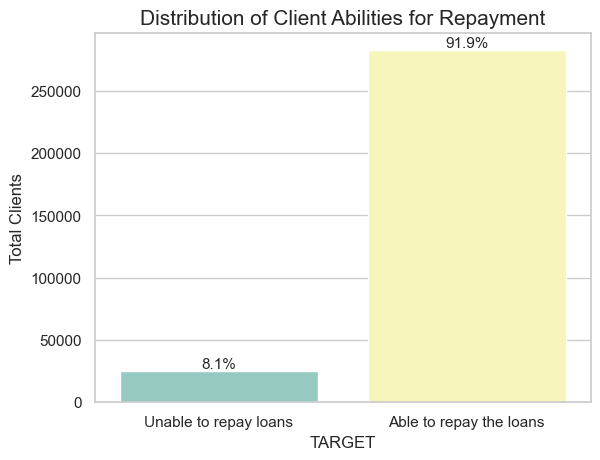

In [6]:
def plot_target_distribution(data):
    sns.set(style="whitegrid")
    ax = sns.countplot(x="TARGET", data=data, palette="Set3")
    ax.set_title('Distribution of Client Abilities for Repayment', fontdict={'size': 15})
    ax.set_ylabel('Total Clients')

    # Menambahkan label persentase di atas batang plot
    for p in ax.patches:
        percentage = f'{(100 * p.get_height() / len(data)):.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

    plt.show()

# Example usage:
plot_target_distribution(df_train2)

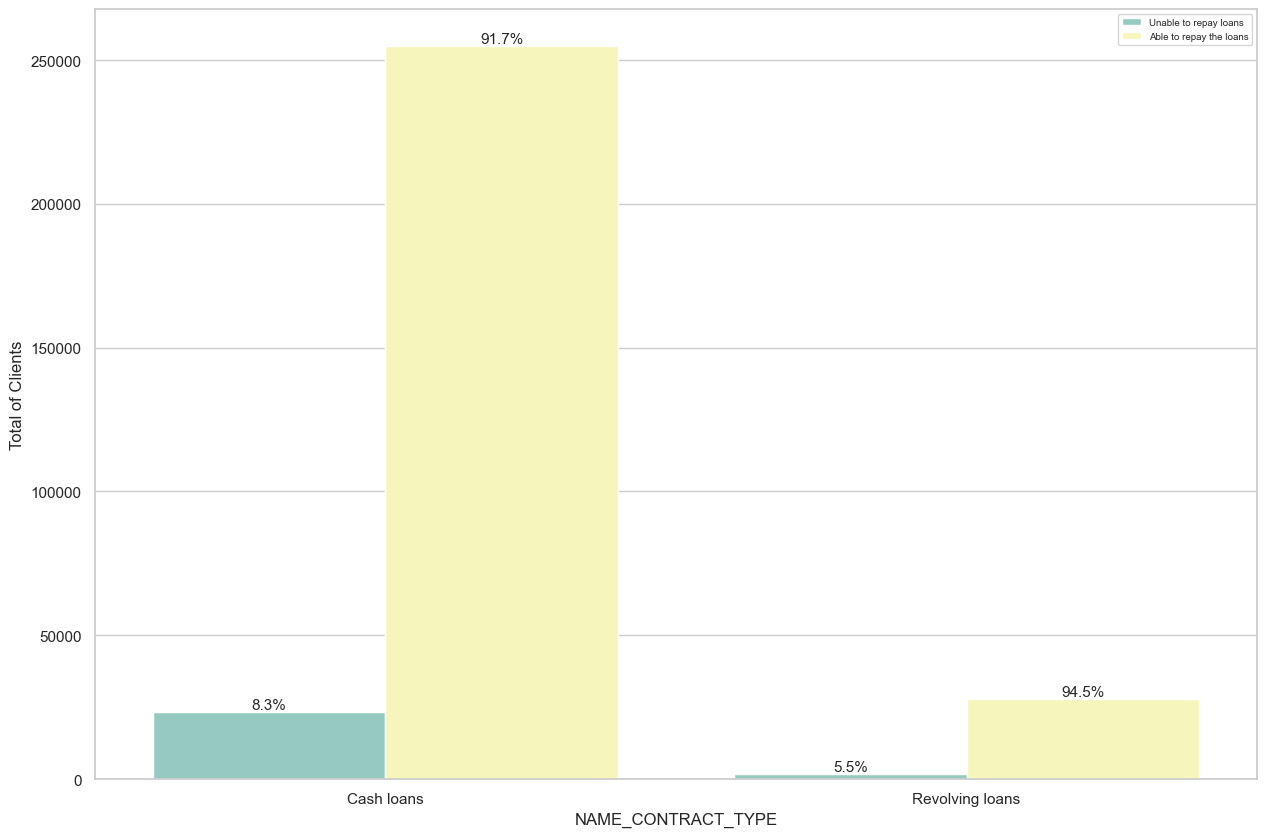

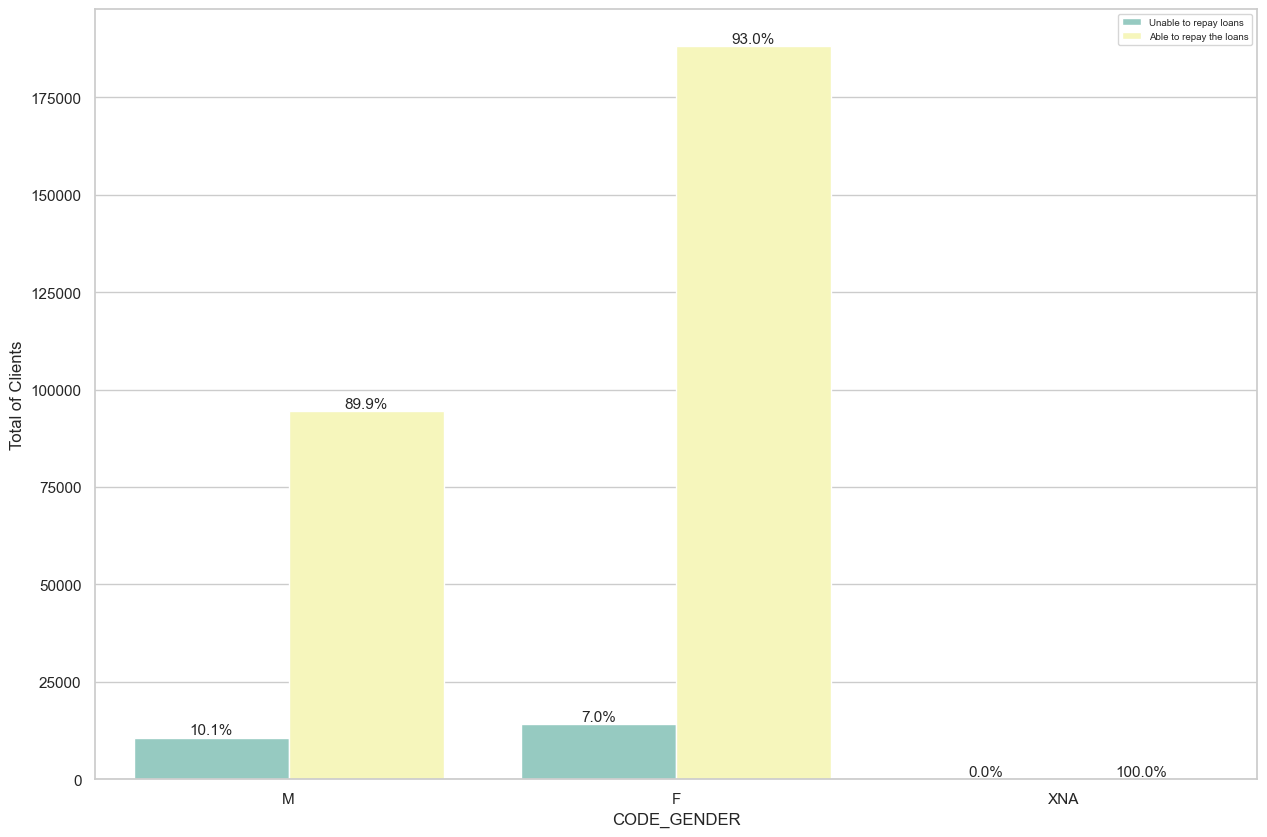

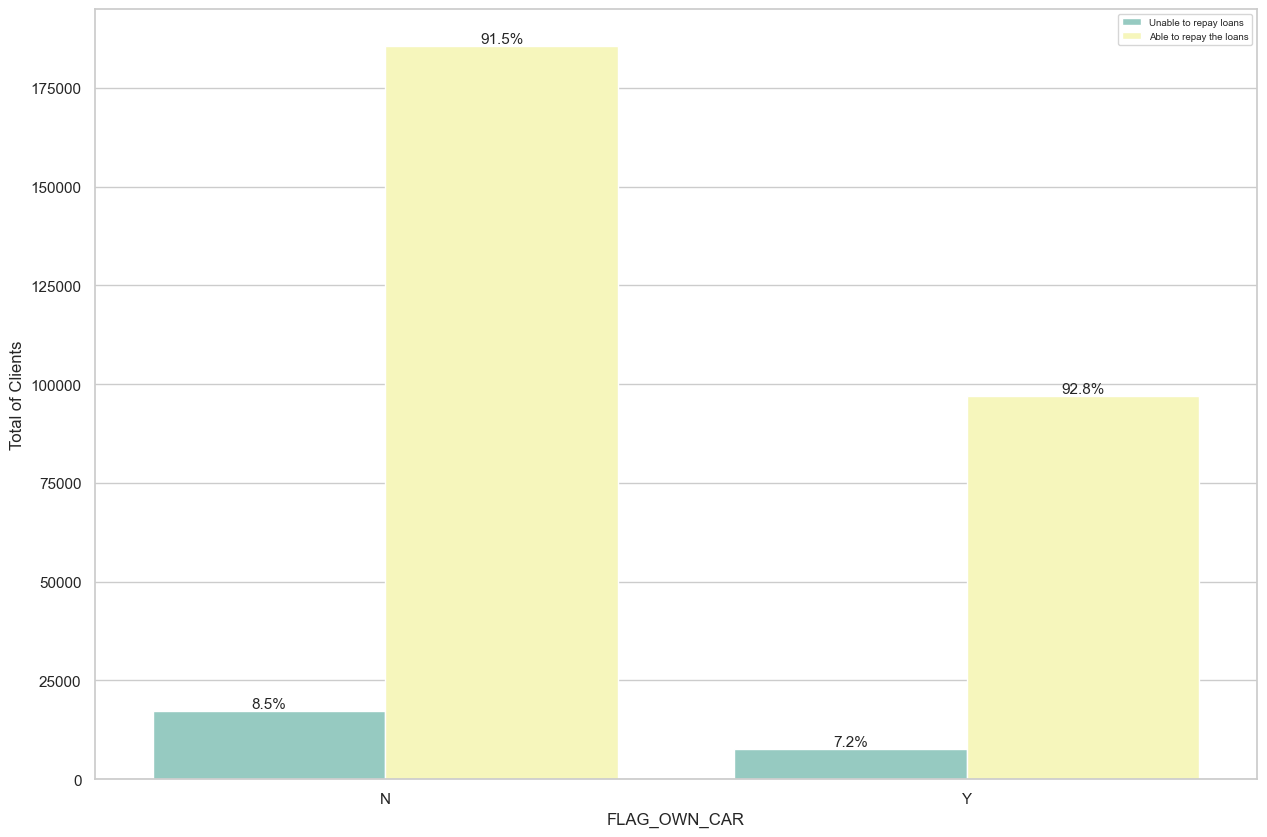

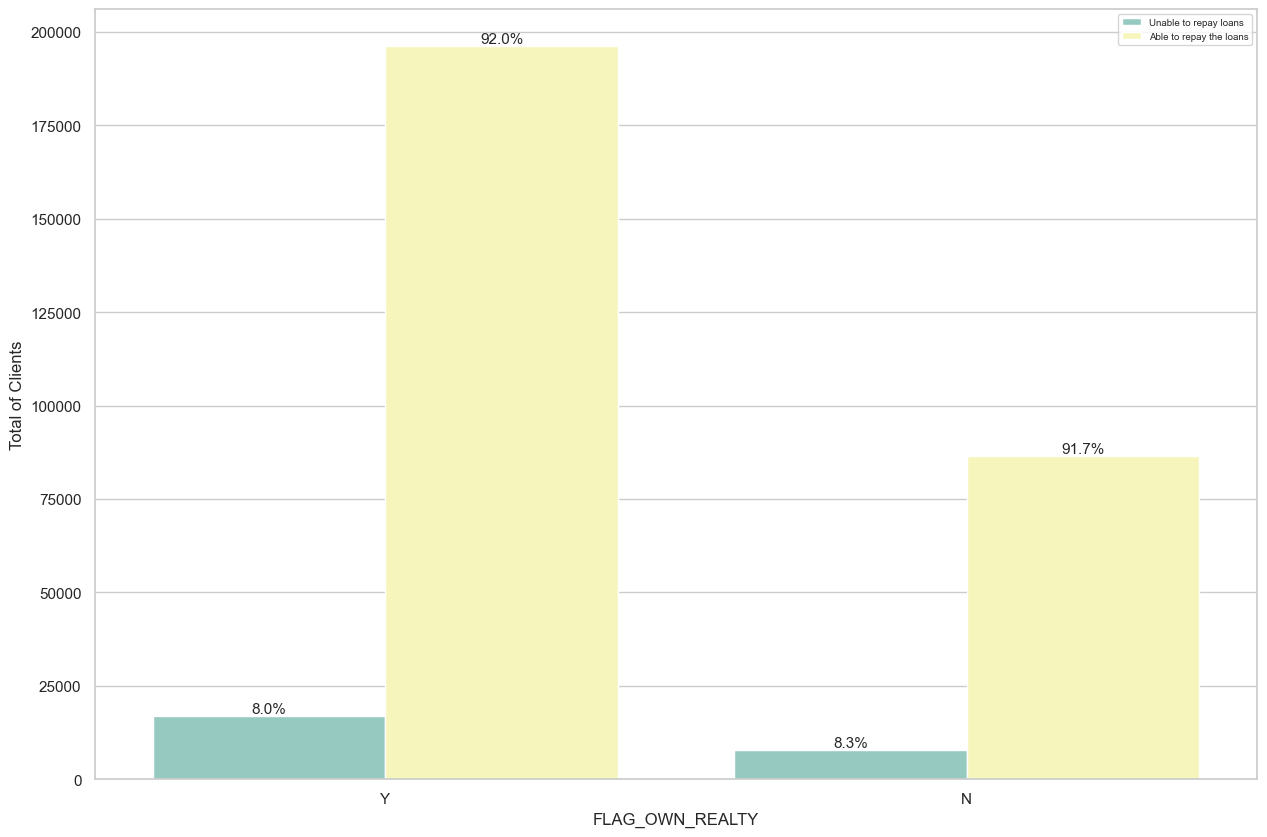

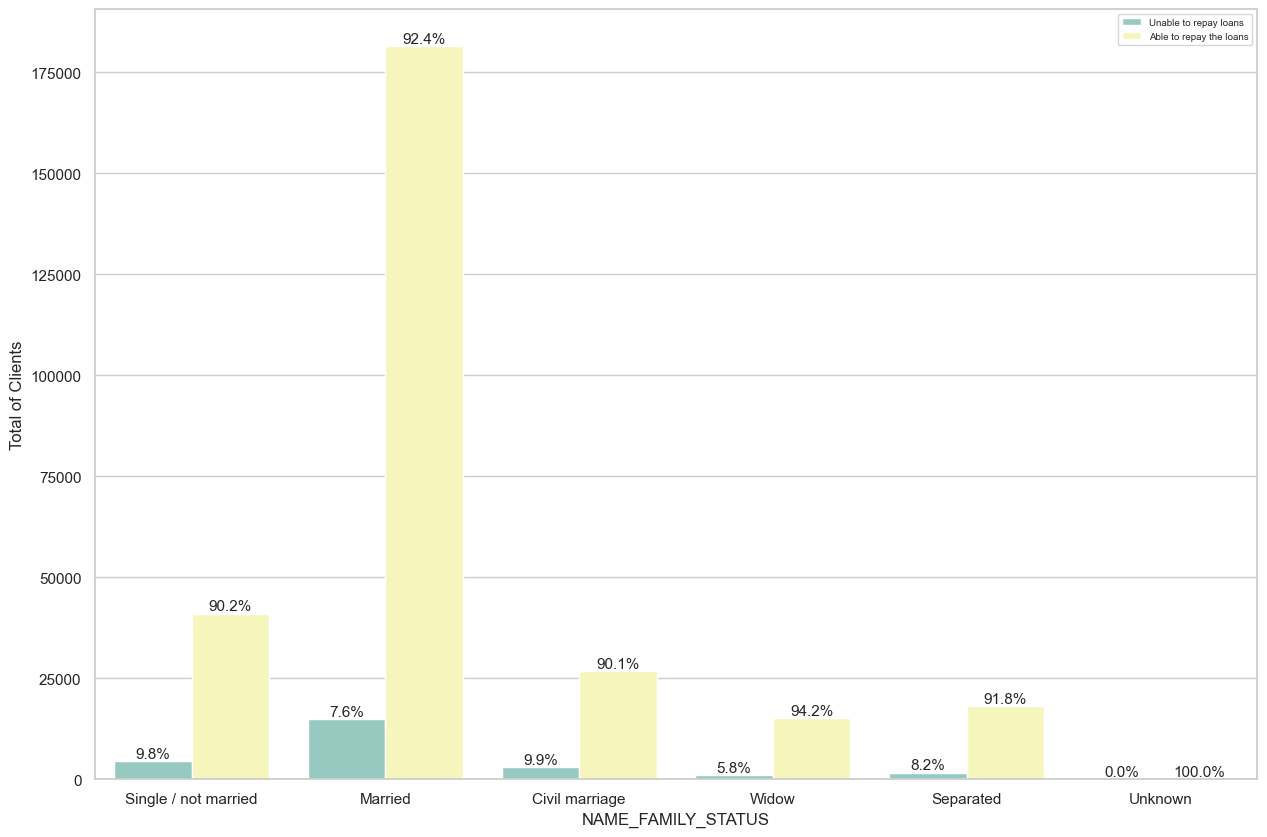

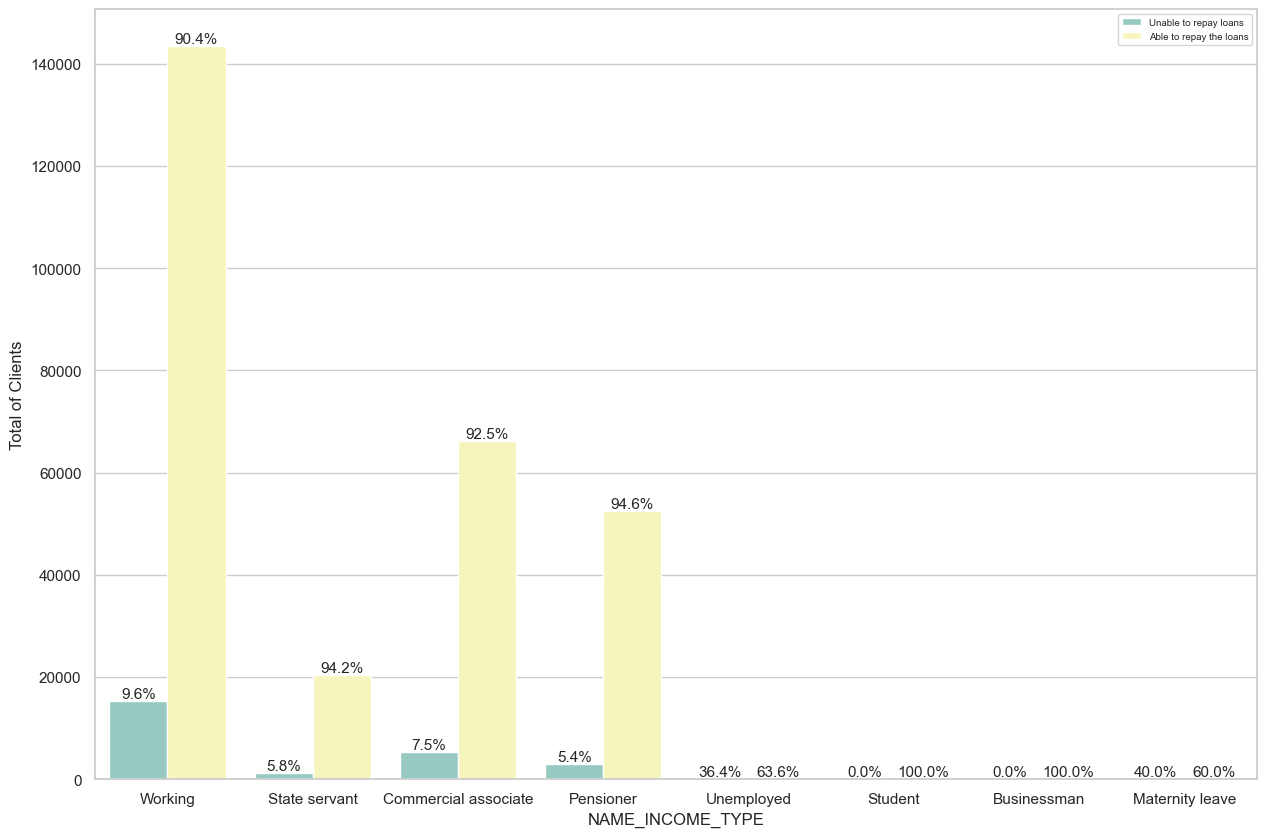

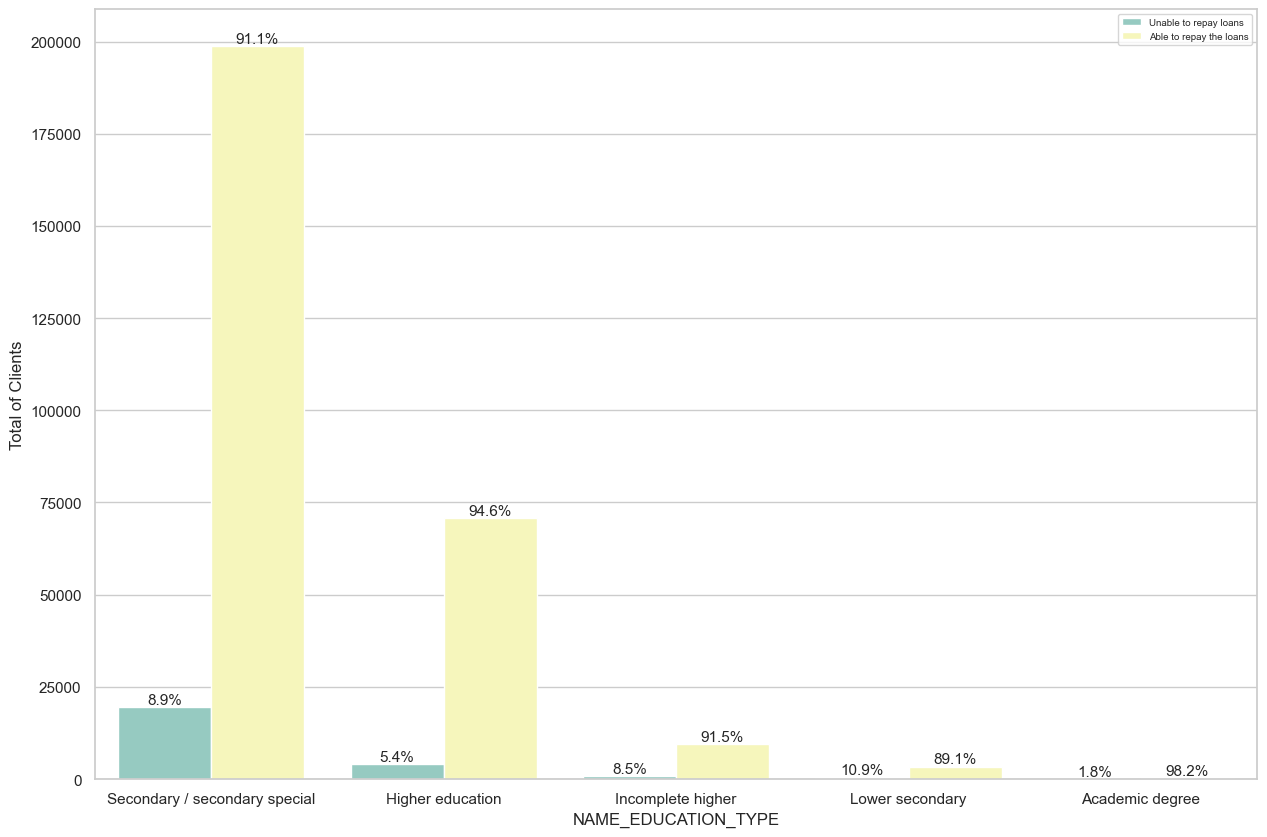

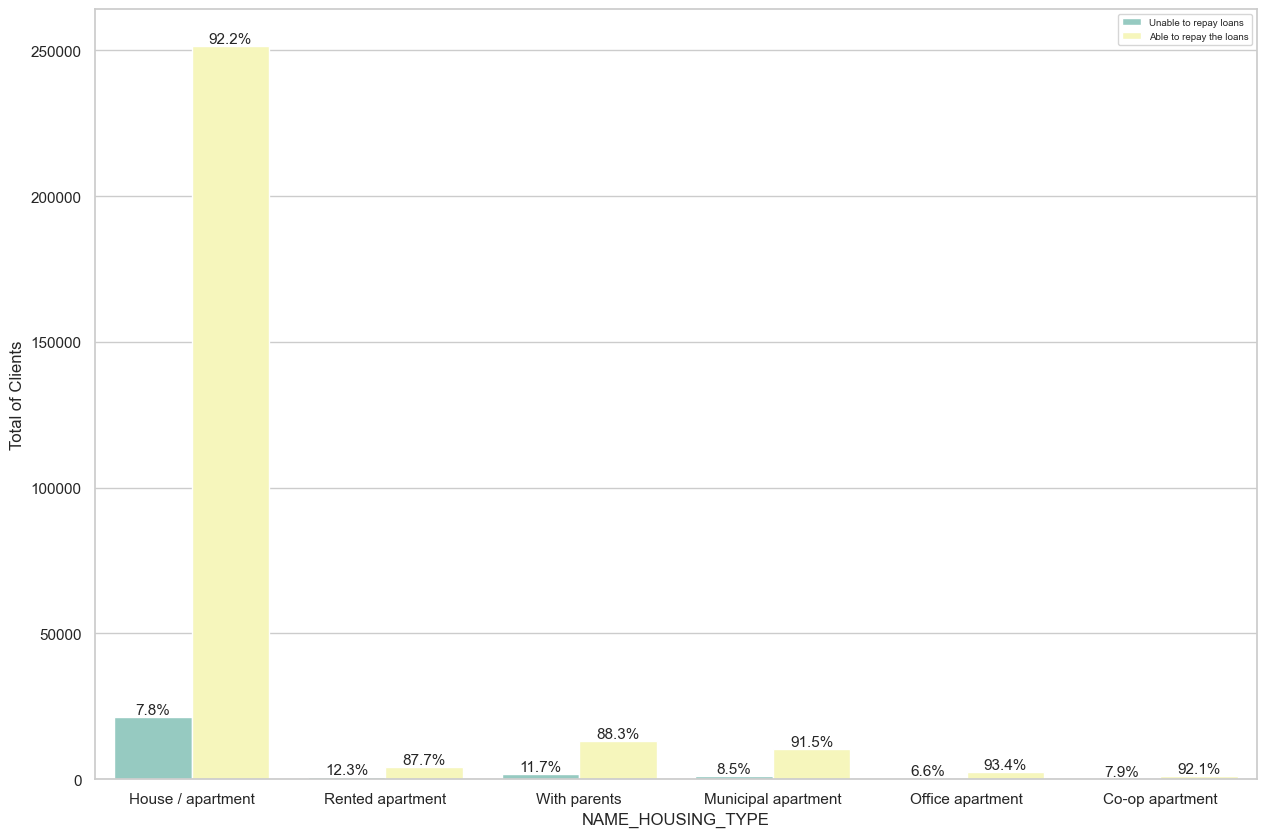

In [7]:
#Visualization
def prcntg(axx):
    all_heights = [[p.get_height() for p in bars] for bars in axx.containers]
    for bars in axx.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            axx.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

def plot_total_clients_by_category(data, x_category, hue_category):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.countplot(x=x_category, data=data, hue=hue_category, palette='Set3')
    plt.ylabel('Total of Clients')
    plt.legend(fontsize="7")
    prcntg(ax)
    plt.show()

# Example usage:
plot_total_clients_by_category(df_train2, 'NAME_CONTRACT_TYPE', 'TARGET')
plot_total_clients_by_category(df_train2, 'CODE_GENDER', 'TARGET')
plot_total_clients_by_category(df_train2, 'FLAG_OWN_CAR', 'TARGET')
plot_total_clients_by_category(df_train2, 'FLAG_OWN_REALTY', 'TARGET')
plot_total_clients_by_category(df_train2, 'NAME_FAMILY_STATUS', 'TARGET')
plot_total_clients_by_category(df_train2, 'NAME_INCOME_TYPE', 'TARGET')
plot_total_clients_by_category(df_train2, 'NAME_EDUCATION_TYPE', 'TARGET')
plot_total_clients_by_category(df_train2, 'NAME_HOUSING_TYPE', 'TARGET')

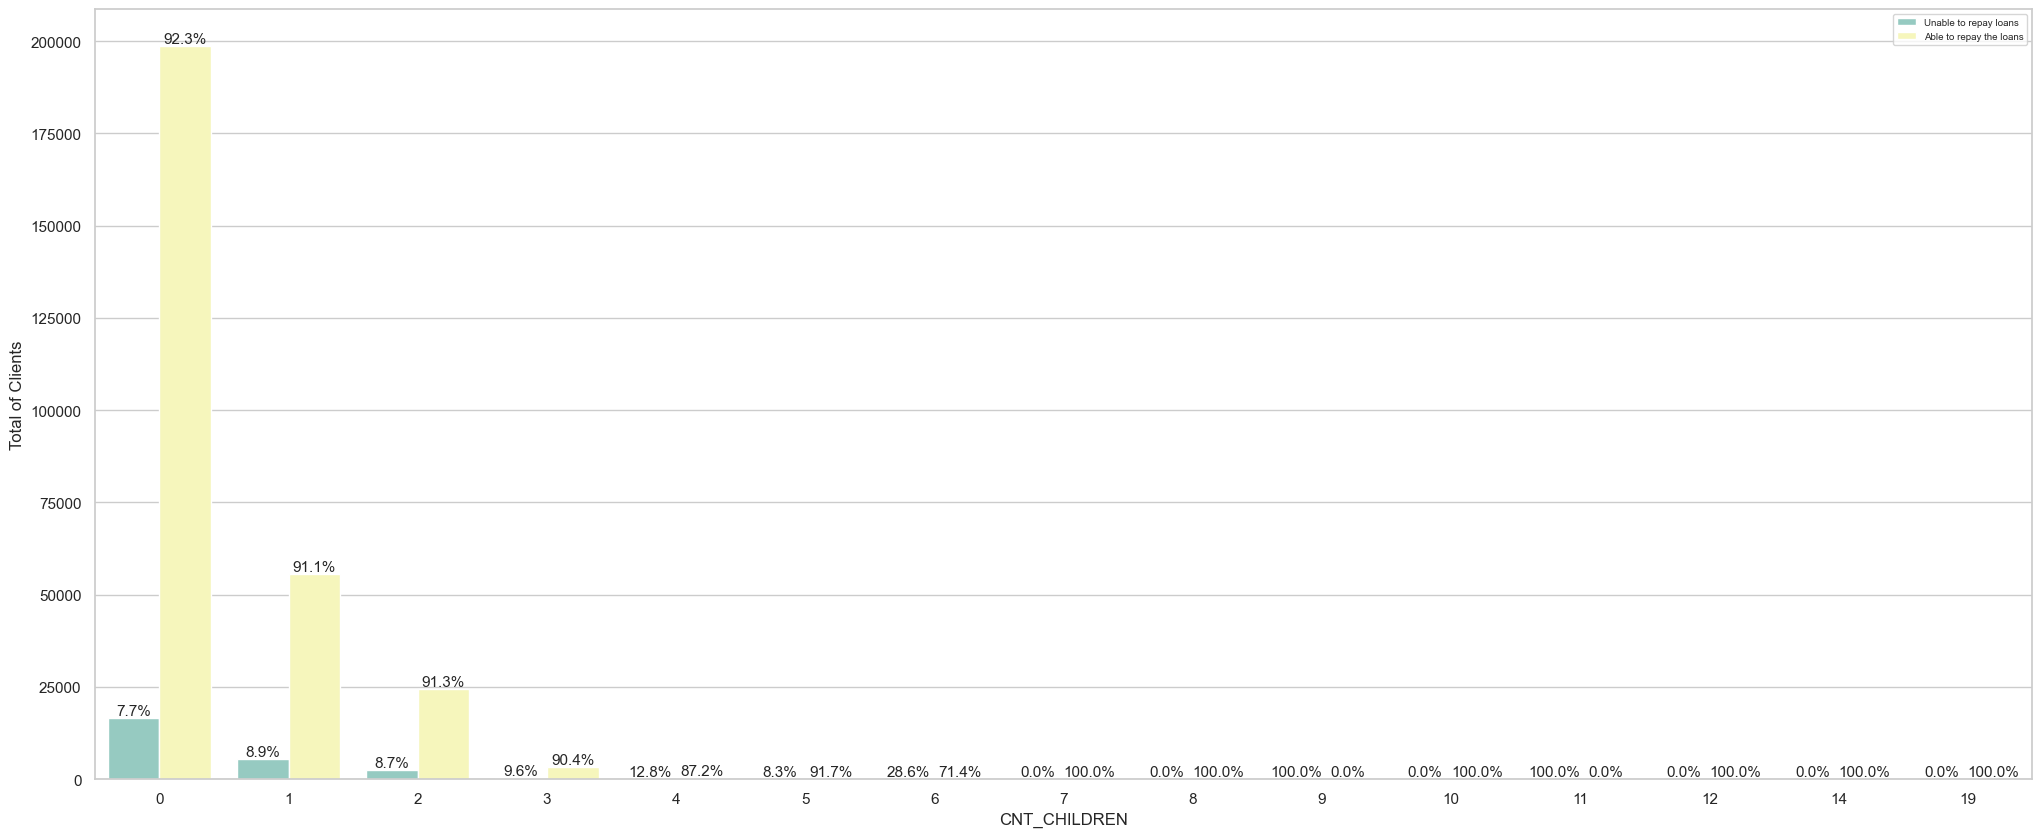

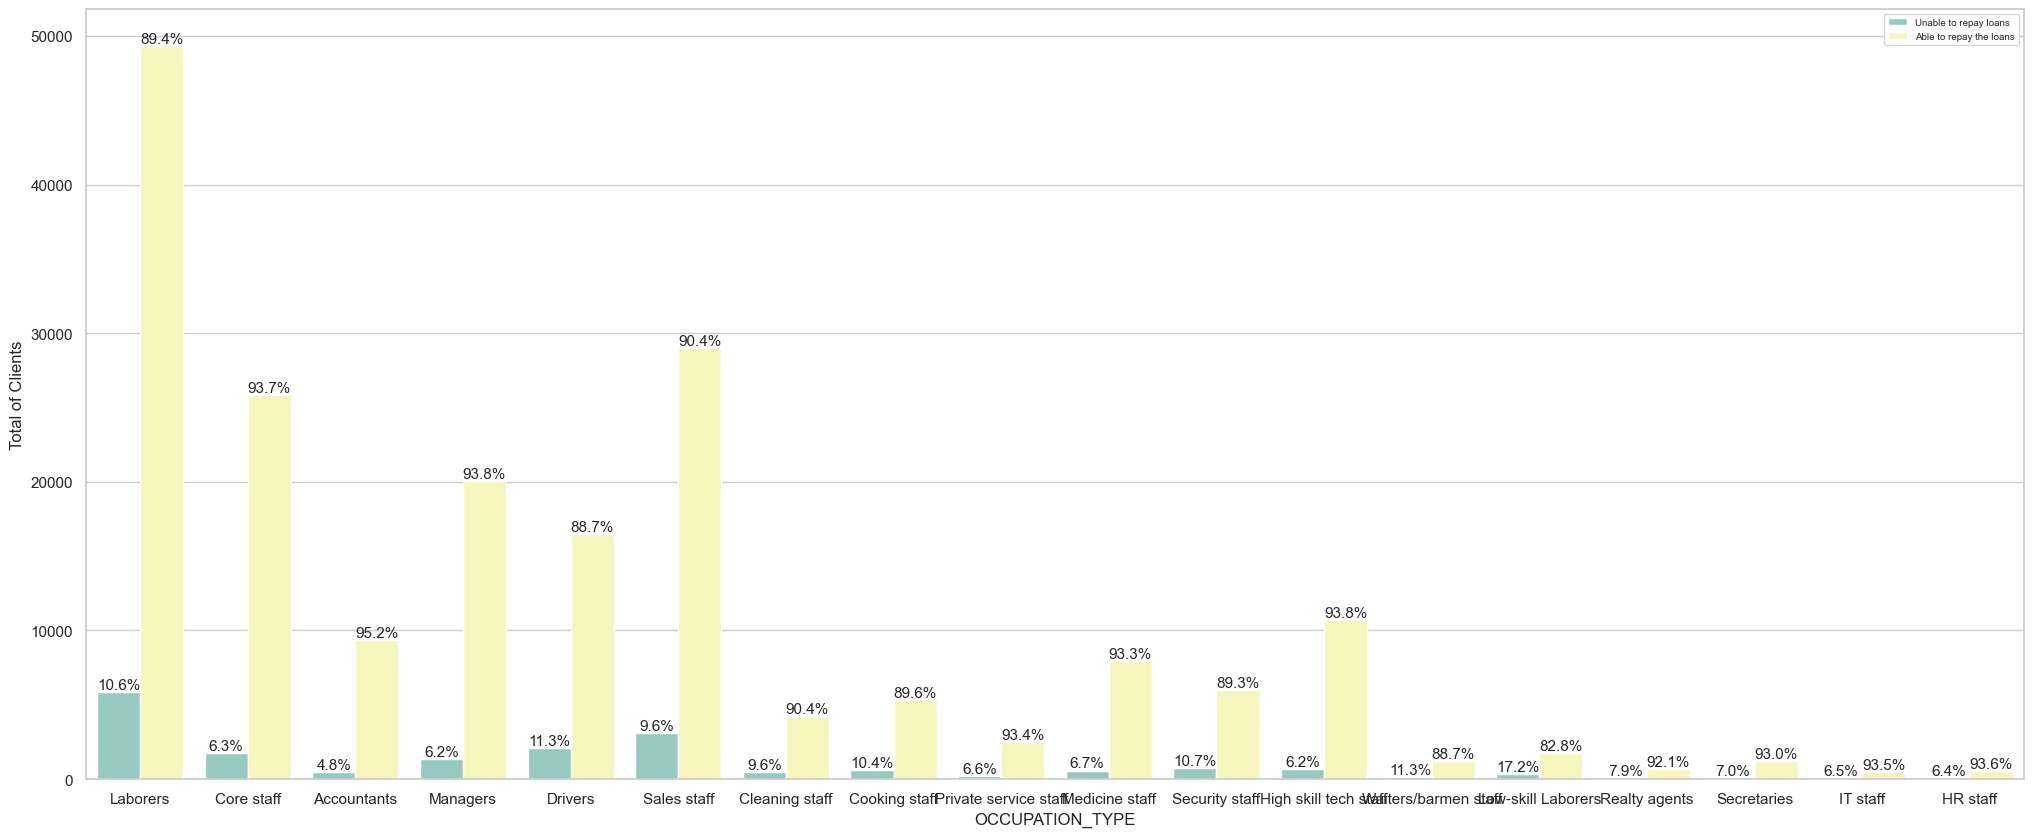

In [8]:
def prcntg(axx):
    all_heights = [[p.get_height() for p in bars] for bars in axx.containers]
    for bars in axx.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            axx.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

def plot_total_clients_by_category(data, x_category, hue_category):
    fig, ax = plt.subplots(figsize=(25, 10))
    ax = sns.countplot(x=x_category, data=data, hue=hue_category, palette='Set3')
    plt.ylabel('Total of Clients')
    plt.legend(fontsize="7")
    prcntg(ax)
    plt.show()

# Example usage:
plot_total_clients_by_category(df_train2, 'CNT_CHILDREN', 'TARGET')
plot_total_clients_by_category(df_train2, 'OCCUPATION_TYPE', 'TARGET')

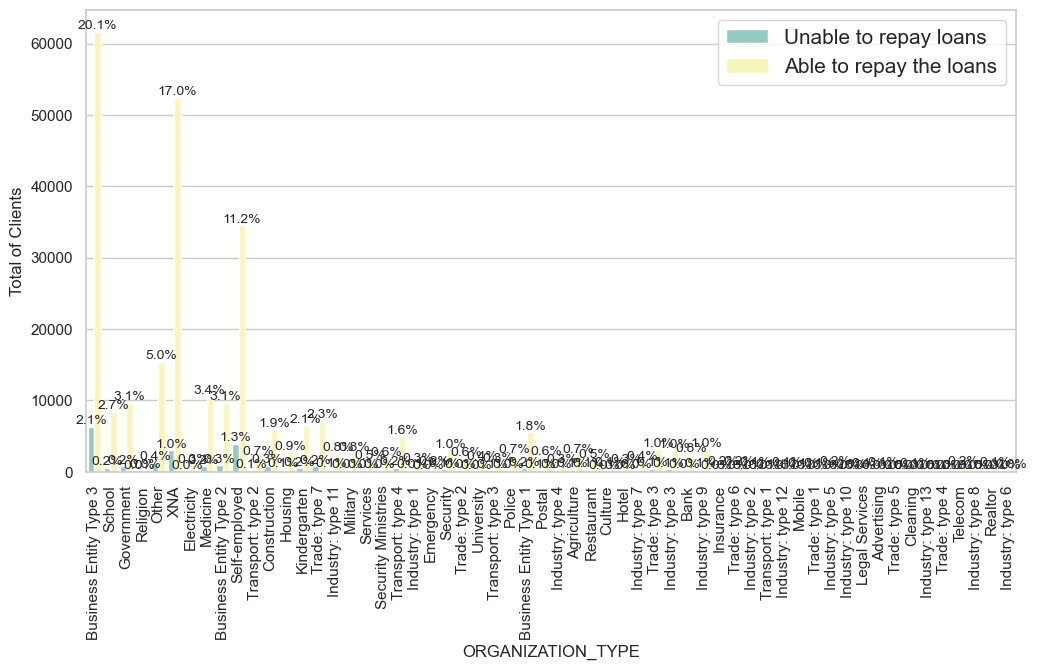

In [9]:
def plot_total_clients_by_category(data, x_category, hue_category):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=x_category, data=data, hue=hue_category, palette='Set3')
    plt.ylabel('Total of Clients')
    plt.legend(fontsize="15")
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height(), f'{(100 * p.get_height() / len(data)):.1f}%', 
                 size=10, ha='center', va='bottom')

    plt.show()

# Example usage:
plot_total_clients_by_category(df_train2, 'ORGANIZATION_TYPE', 'TARGET')

## Data Cleaning

In [10]:
#Missing Data
def check_missing_data(data):
    missVal = df_train.isnull().sum().sort_values(ascending=False)
    missValPrcnt = (df_train.isnull().sum() / df_train.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([missVal, missValPrcnt], axis=1, keys=['Total Missing Value', 'Percentage'])

missing_data_summary = check_missing_data(df_train)
missing_data_summary.head(20)

,Total Missing Value,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [11]:
#Duplicate Data
def check_duplicate_data(df_train):
    return df_train.duplicated().sum()

duplicate_count = check_duplicate_data(df_train)
print('Duplicate Value:', duplicate_count)

Duplicate Value: 0


### Modelling

In [12]:
def label_encode_categorical_columns(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
    objList = df.select_dtypes(include="object").columns
    le = LabelEncoder()
    
    for feat in objList:
        df[feat] = le.fit_transform(df[feat].astype(str))
    
    df = df.fillna(0)
    
    return df

df_train = label_encode_categorical_columns(df_train)print(df_train.head())

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         3510

Class counts after resampling:
TARGET
1    282686
0    282686
Name: count, dtype: int64


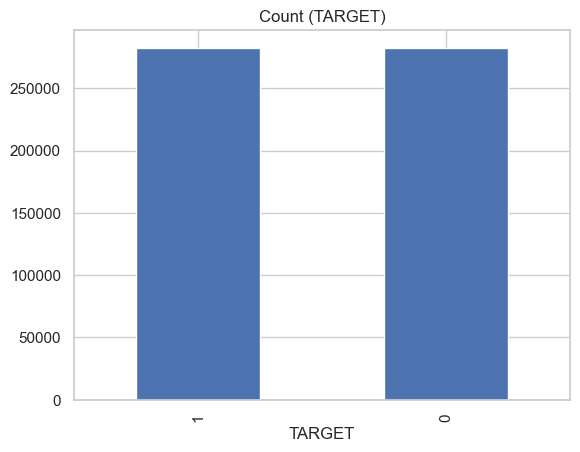

In [53]:
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()

# Divide class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

# Use random over-sampling so that not much information is lost
df_class_1_up = resample(df_class_1, replace=True, n_samples=count_class_0, random_state=42)
df_oversampling = pd.concat([df_class_1_up, df_class_0], axis=0)

# Tampilkan jumlah kelas setelah resampling
print(f'Class counts after resampling:\n{df_oversampling.TARGET.value_counts()}')

# Plot bar chart
df_oversampling.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');


In [14]:
#data splitting
target = df_oversampling['TARGET']
ft_train = df_oversampling.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(ft_train, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 121) (113075, 121)


In [20]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
X_train = scaler.fit_transform(X_train)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (452297, 121)
Testing data shape:  (113075, 121)


In [41]:
# Inisialisasi model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/marwahinas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
# Membuat prediksi menggunakan data testing
LogisticRegression = logreg.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, LogisticRegression)
conf_matrix = confusion_matrix(y_test, LogisticRegression)
class_report = classification_report(y_test, LogisticRegression)

In [92]:
# Menampilkan hasil
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('\nClassification Report:')
print(class_report)

Accuracy: 0.65
Confusion Matrix:
[[28923 27578]
 [12084 44490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59     56501
           1       0.62      0.79      0.69     56574

    accuracy                           0.65    113075
   macro avg       0.66      0.65      0.64    113075
weighted avg       0.66      0.65      0.64    113075



In [96]:
# Membangun model Decision Tree
decisionTree = DecisionTreeClassifier(random_state=45)
decisionTree.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred_dt = decision_tree.predict(X_test)

In [97]:
# Menampilkan akurasi model
print('Accuracy: {:.2f} \n'.format(DecisionTree.score(X_test, y_test)))

# Menampilkan classification report
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.70 

              precision    recall  f1-score   support

           0       0.64      0.91      0.75     56501
           1       0.85      0.49      0.62     56574

    accuracy                           0.70    113075
   macro avg       0.74      0.70      0.69    113075
weighted avg       0.74      0.70      0.69    113075



In [98]:
# Membangun model Random Forest
RandomForest = RandomForestClassifier(random_state=45)
RandomForest.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = RandomForest.predict(X_test)

In [100]:
# Menampilkan akurasi model
print('Accuracy: {:.2f}\n'.format(RandomForest.score(X_test, y_test)))

# Menampilkan classification report
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.83

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     56501
           1       1.00      0.66      0.80     56574

    accuracy                           0.83    113075
   macro avg       0.87      0.83      0.83    113075
weighted avg       0.87      0.83      0.83    113075



In [101]:
# Data akurasi model
accuracy_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, DecisionTree.score(X_test, y_test), RandomForest.score(X_test, y_test)]
}

# Membuat DataFrame
compare = pd.DataFrame(accuracy_data)

# Menampilkan DataFrame
print(compare)

                 Model  Accuracy
0  Logistic Regression  0.649242
1        Decision Tree  0.701269
2        Random Forest  0.831041


###### Dari 3 model machine learning di atas diketahui jika "Random Forest" memiliki nilai akurasi paling tinggi untuk memprediksi kemampuan pembayaran klien